In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
q_logs = pd.read_csv('./data/rewards_qlearning.csv', index_col=False).iloc[:, 1]
q_td_logs = pd.read_csv('./data/td_error_qlearning.csv', index_col=False).iloc[:, 1]


s_logs = pd.read_csv('./data/rewards_Sarsa.csv', index_col=False).iloc[:, 1]
s_td_logs = pd.read_csv('./data/td_error_Sarsa.csv', index_col=False).iloc[:, 1]

s_logs = pd.read_csv('./data/rewards_Sarsa.csv', index_col=False).iloc[:, 1]
s_td_logs = pd.read_csv('./data/td_error_Sarsa.csv', index_col=False).iloc[:, 1]

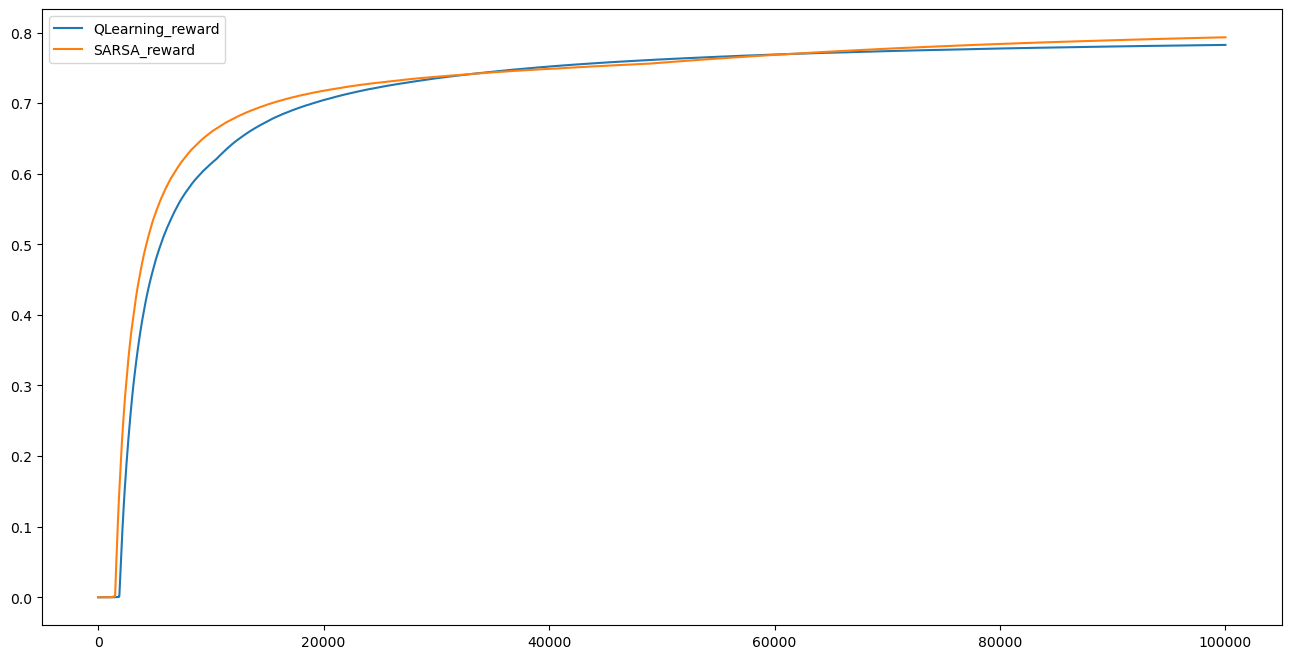

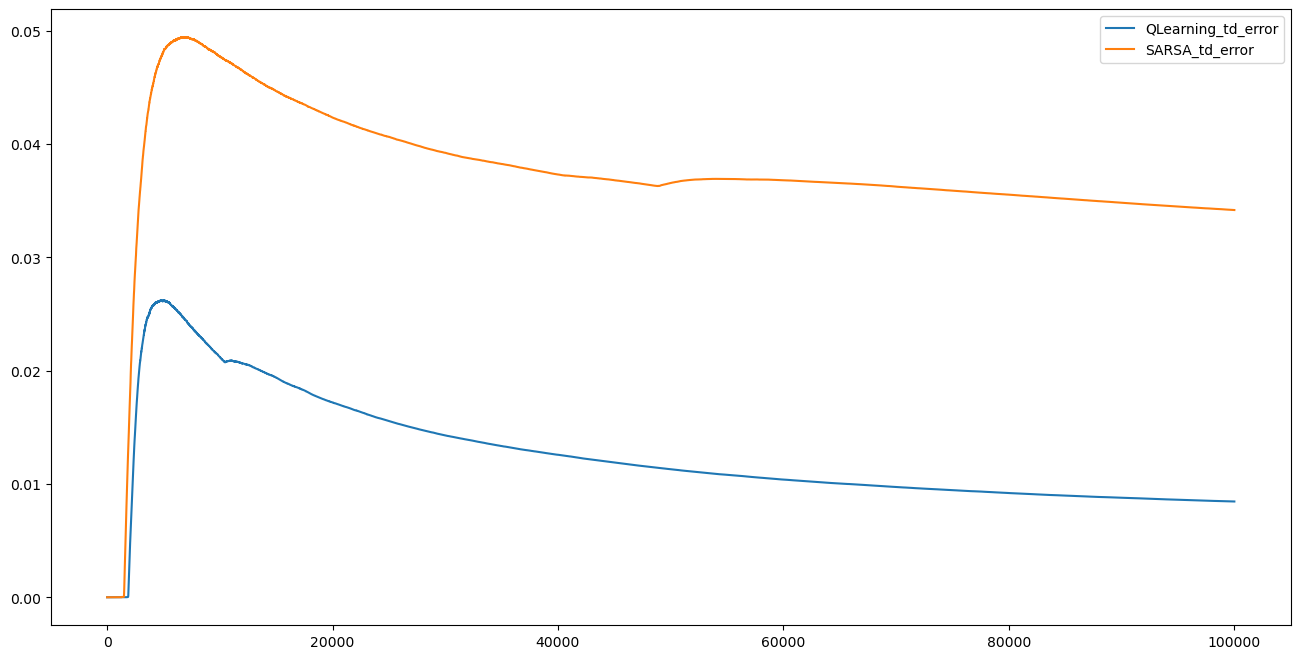

In [5]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="QLearning_reward")
plt.plot(s_logs.cumsum() / (pd.Series(np.arange(s_logs.shape[0]))+1), label="SARSA_reward")
plt.legend()
plt.show()


#td_err0r
plt.figure(figsize=(16, 8))
plt.plot(q_td_logs.cumsum() / (pd.Series(np.arange(q_td_logs.shape[0]))+1), label="QLearning_td_error")
plt.plot(s_td_logs.cumsum() / (pd.Series(np.arange(s_td_logs.shape[0]))+1), label="SARSA_td_error")
plt.legend()
plt.show()

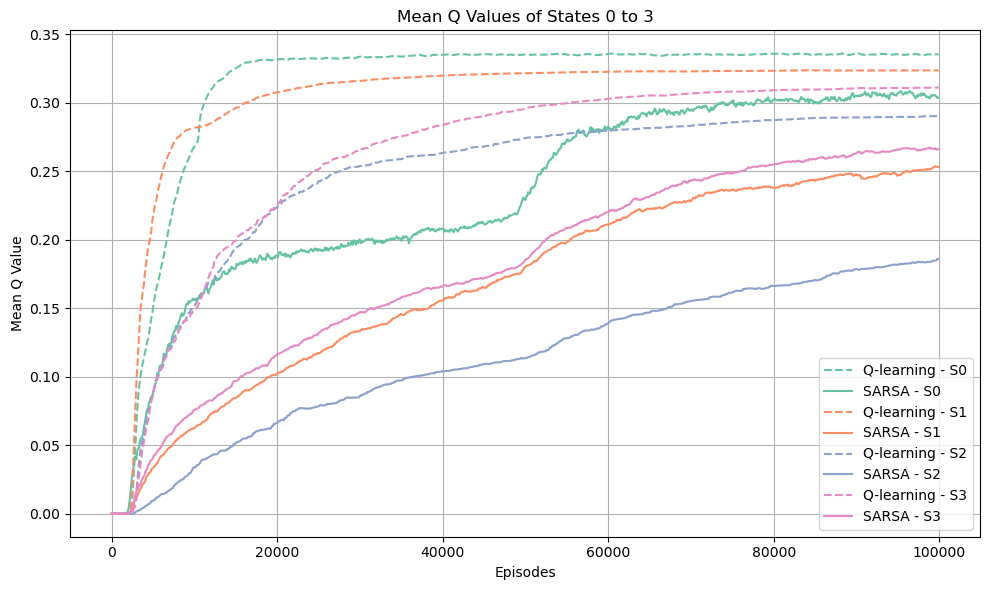

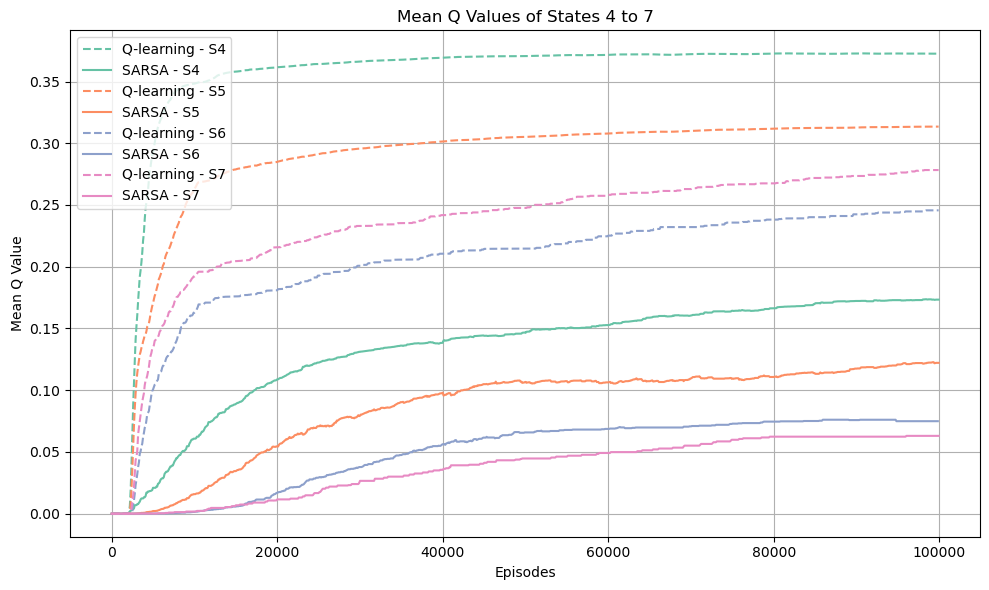

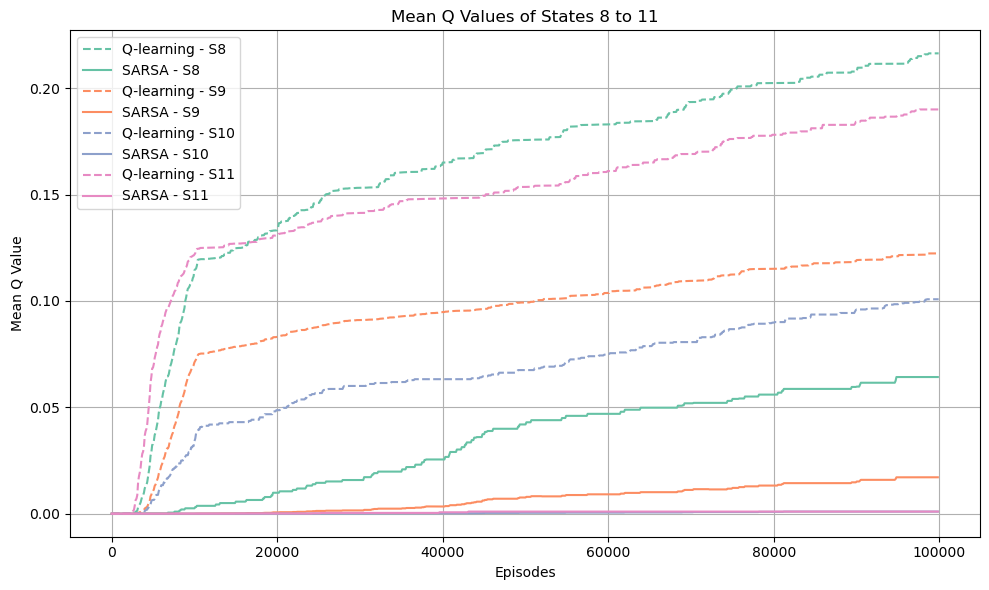

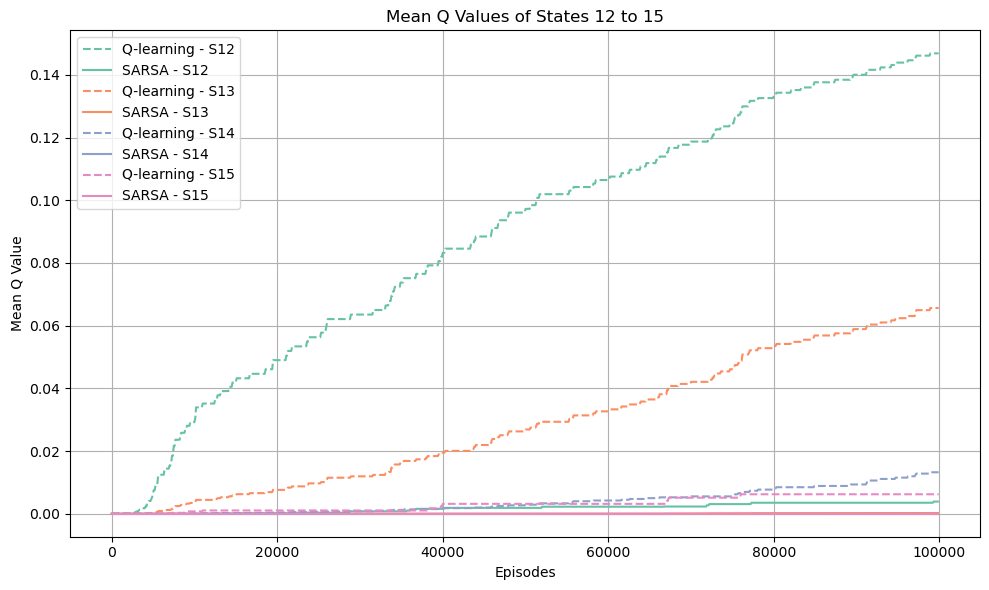

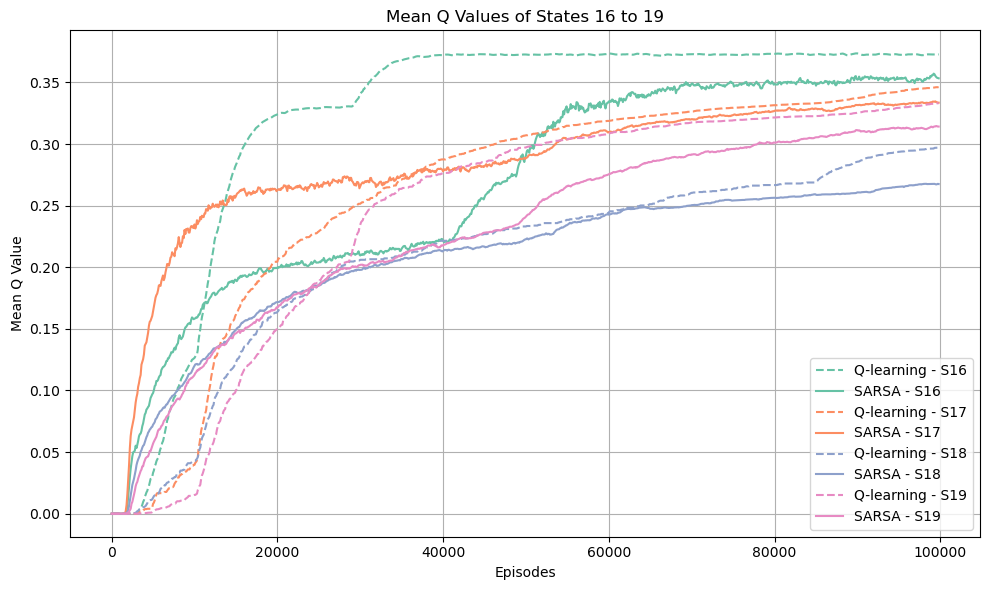

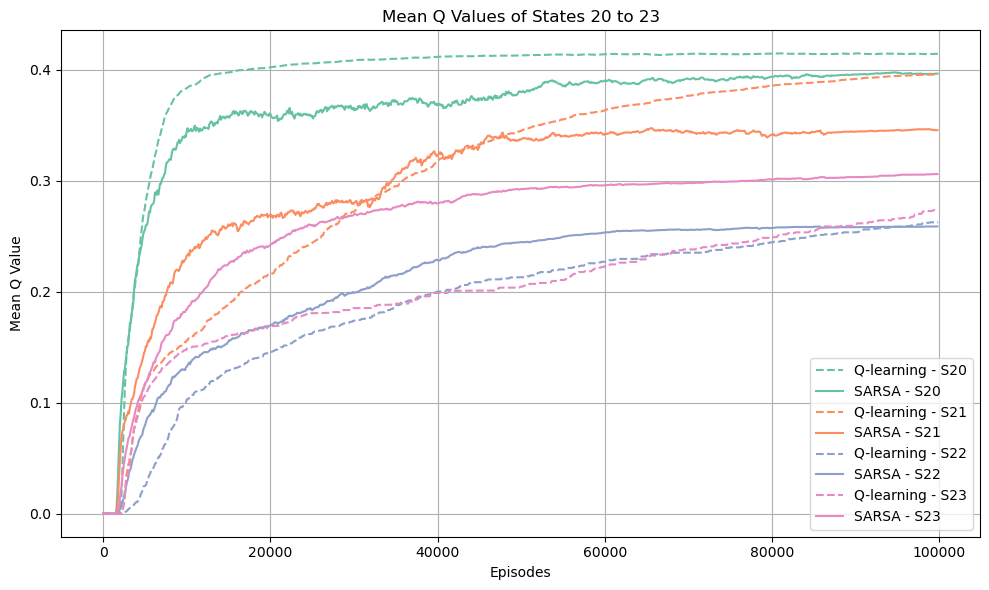

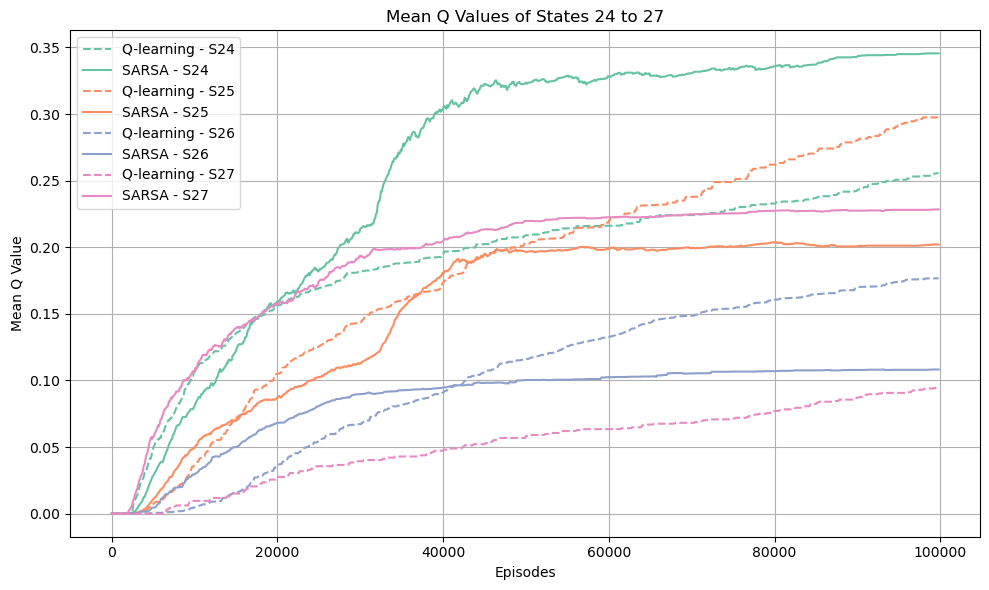

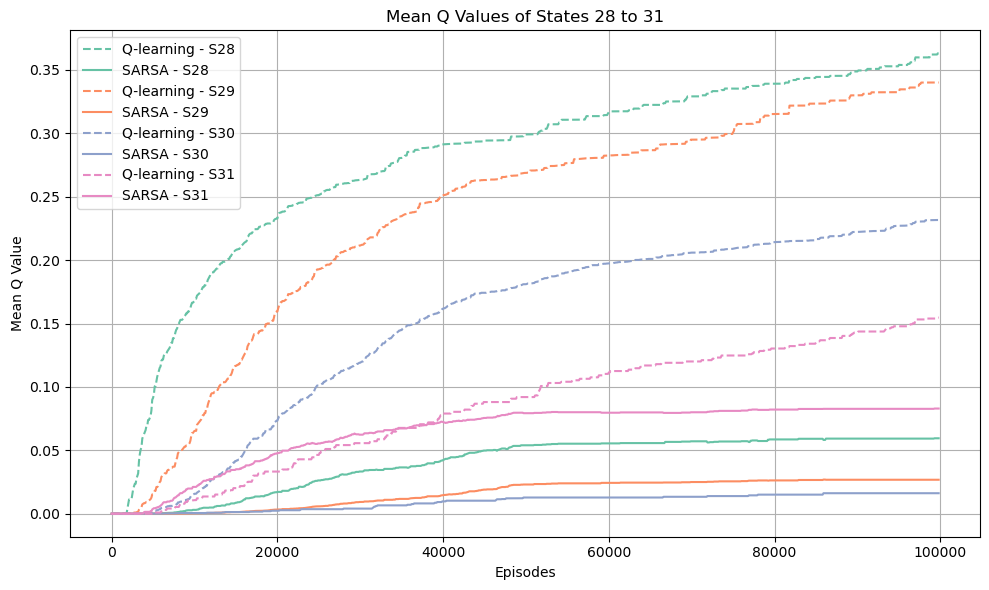

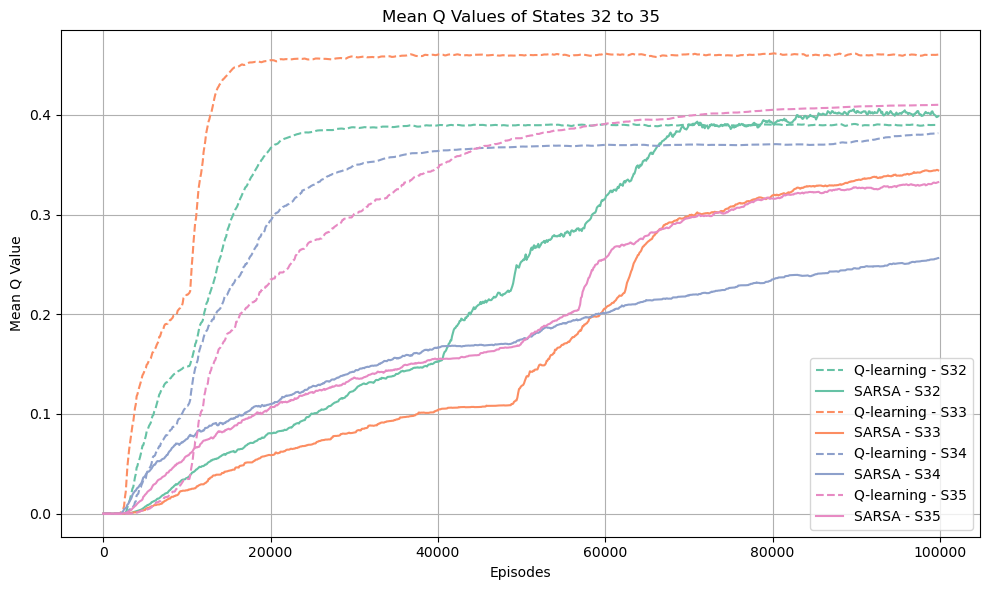

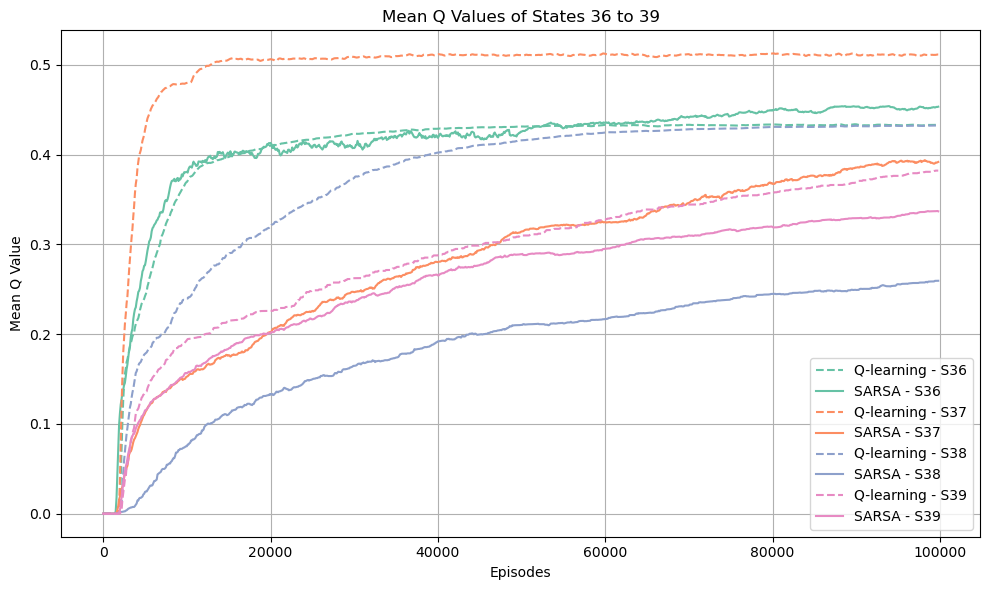

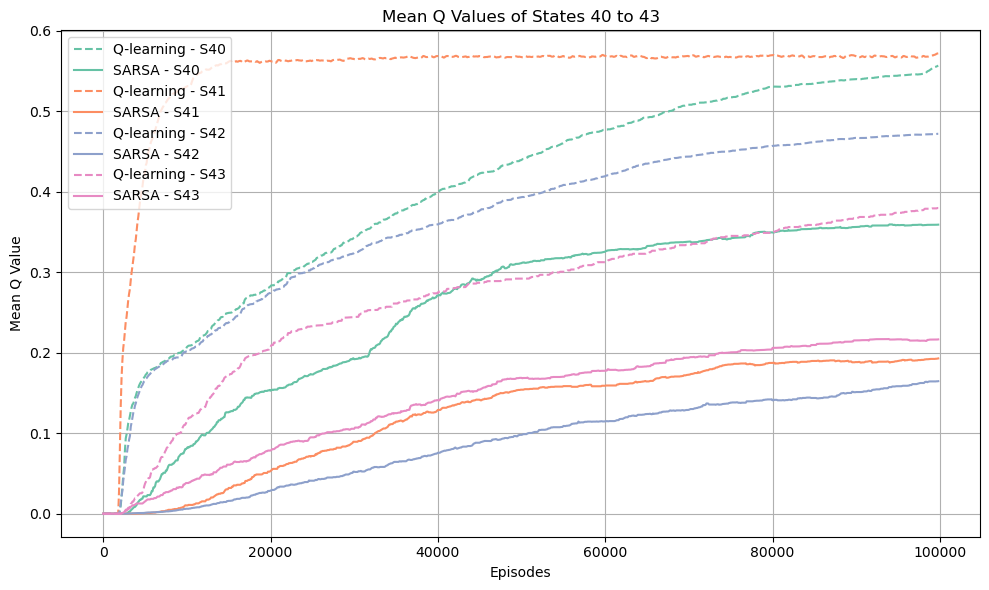

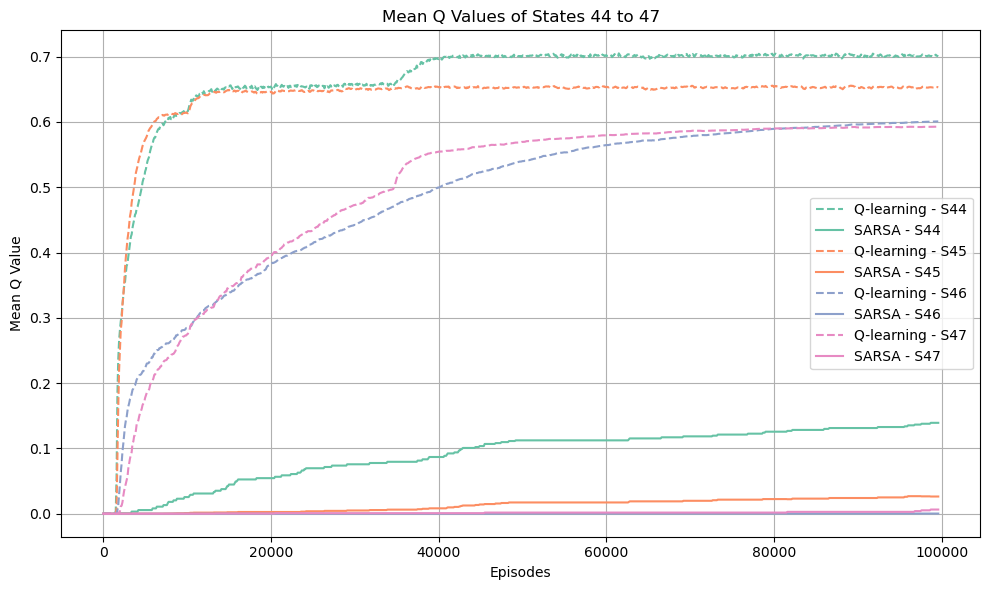

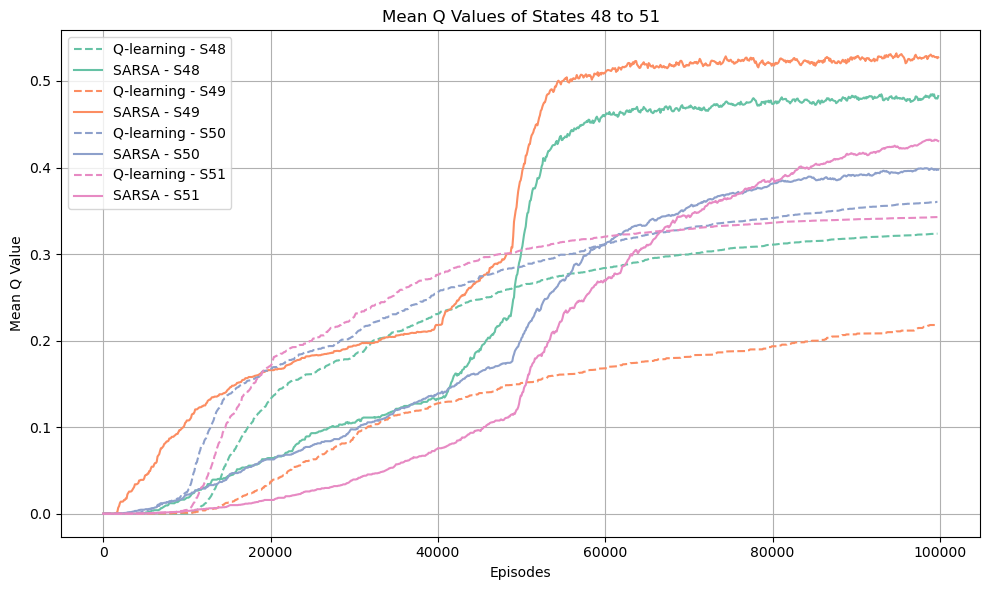

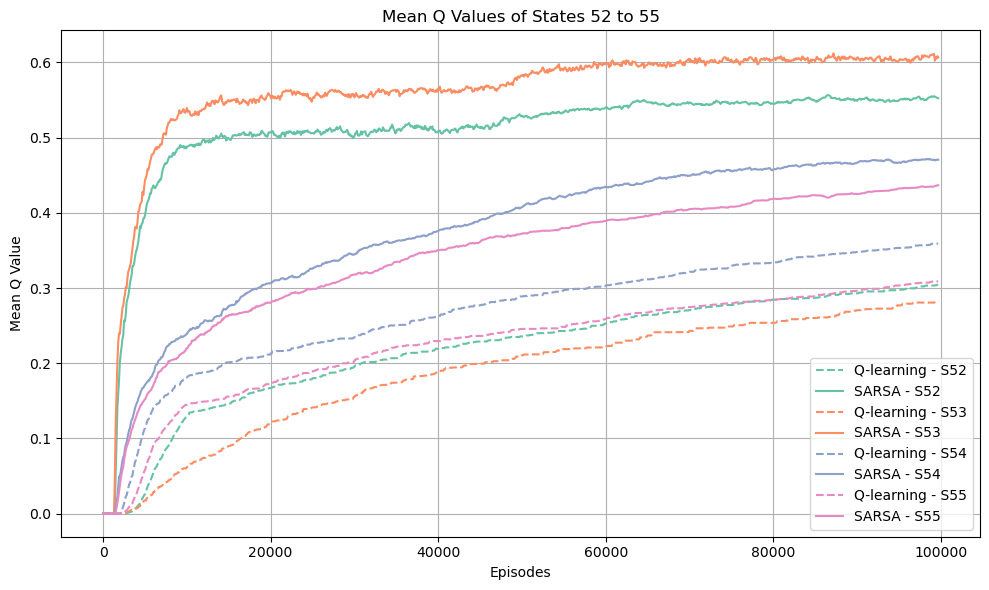

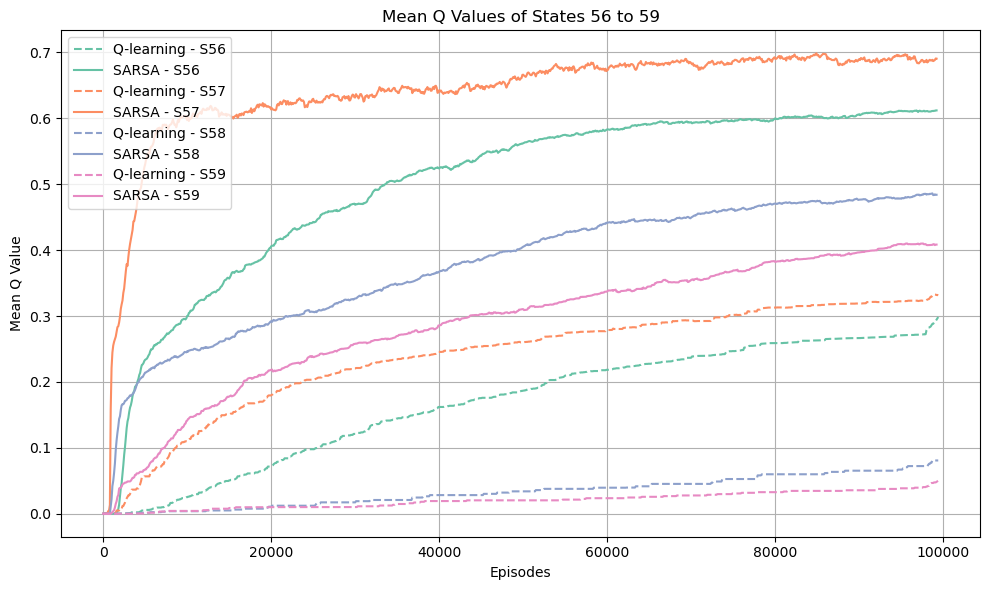

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn as sns
# CSV 파일 불러오기
s_q_history = pd.read_csv('./data/state_meanQ_Sarsa.csv', index_col=0).iloc[:, 0]
q_q_history = pd.read_csv('./data/state_meanQ_qlearning.csv', index_col=0).iloc[:, 0]

# 문자열로 저장된 리스트 → 실제 리스트로 변환
s_q_history = s_q_history.apply(ast.literal_eval)
q_q_history = q_q_history.ap ply(ast.literal_eval)

# state 리스트 정렬
s_states = sorted(s_q_history.keys())
q_states = sorted(q_q_history.keys())

# 컬러 팔레트 및 색상 매핑 
palette = sns.color_palette("Set2", 4)  


for i in range(0, 60, 4):
    subset_states = s_states[i:i+4]
    
    plt.figure(figsize=(10, 6))
    
    for s in subset_states:
        
        color = palette[s % 4]  
        
        x = np.arange(0, len(q_q_history[s]) * 100, 100)#episode에  맞게 100을 곱함
        y = np.arange(0, len(s_q_history[s]) * 100, 100)
        
        plt.plot(x, q_q_history[s], label=f"Q-learning - S{s}", linestyle='--', color=color)
        plt.plot(y, s_q_history[s], label=f"SARSA - S{s}", linestyle='-', color=color)

        
    plt.xlabel("Episodes")
    plt.ylabel("Mean Q Value")
    plt.title(f"Mean Q Values of States {subset_states[0]} to {subset_states[-1]}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

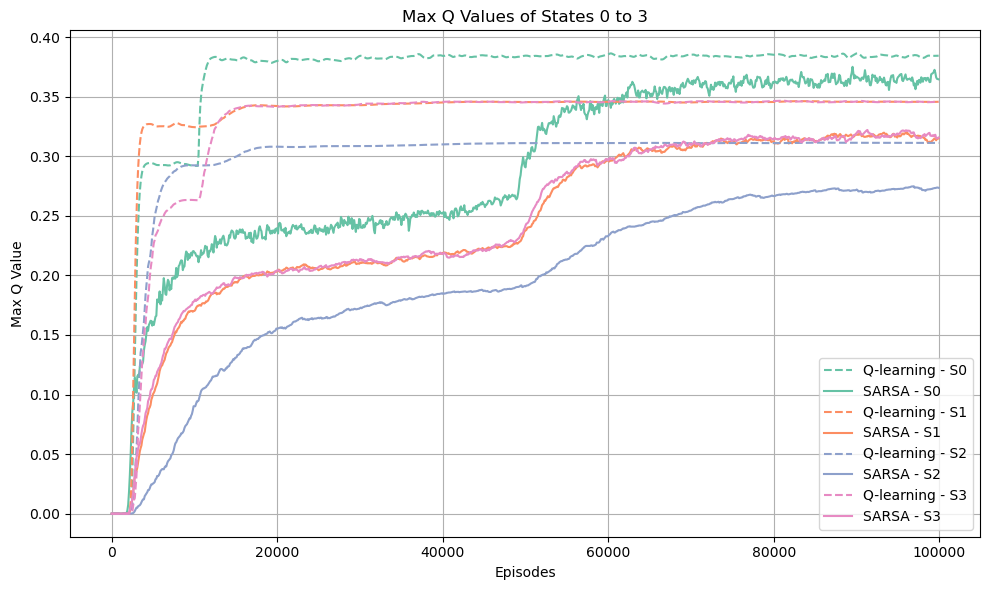

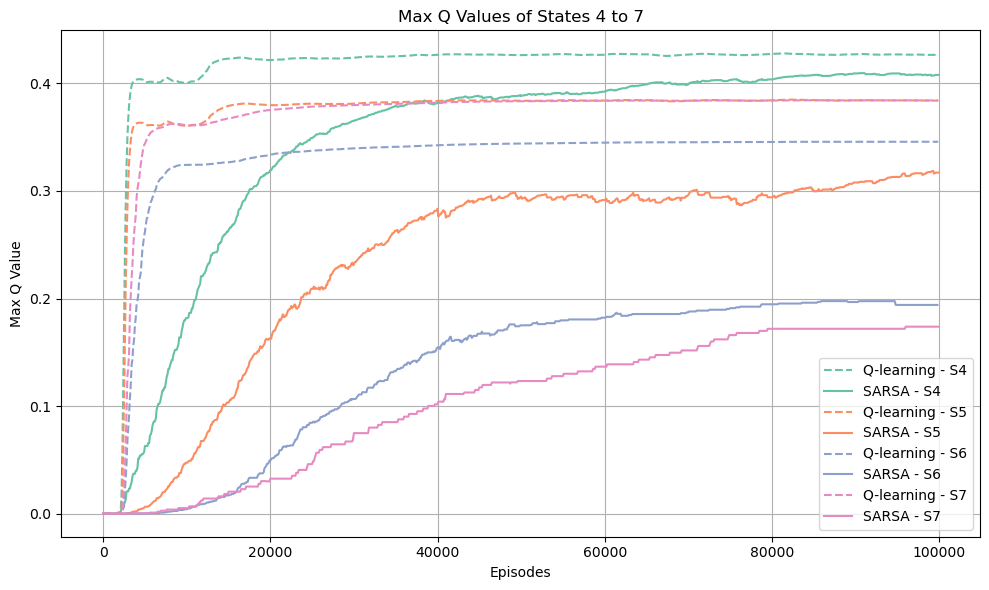

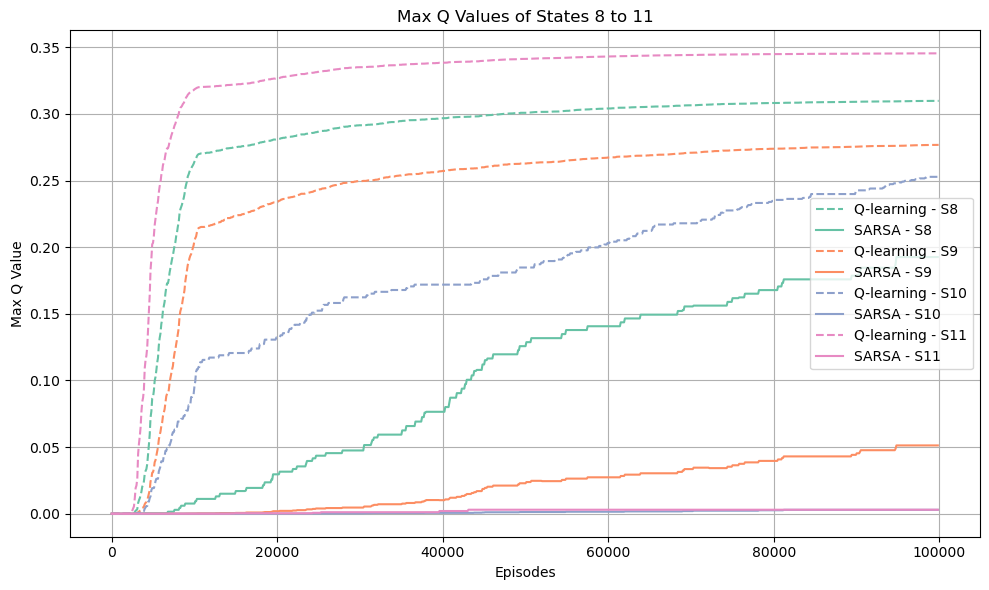

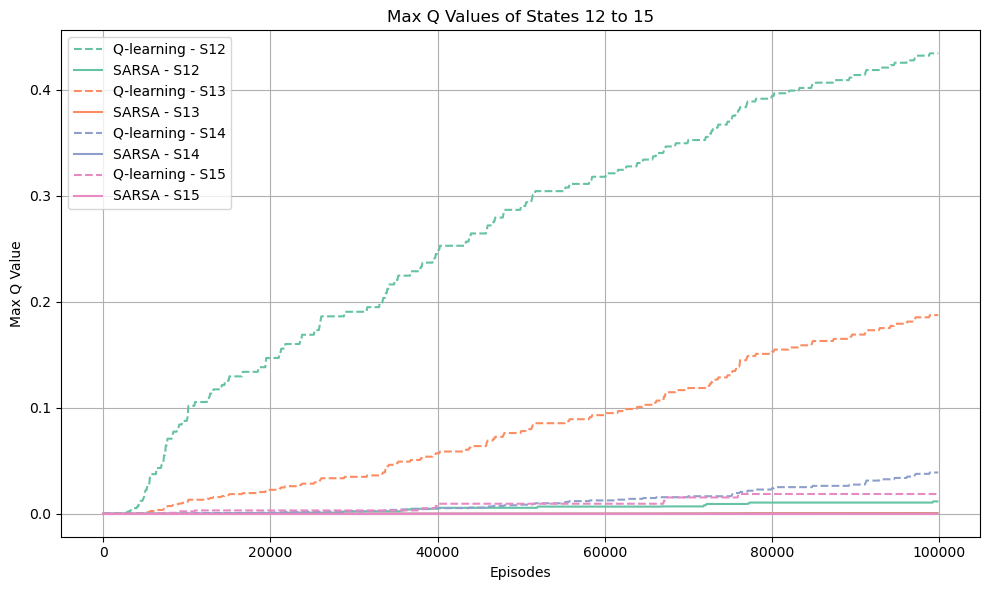

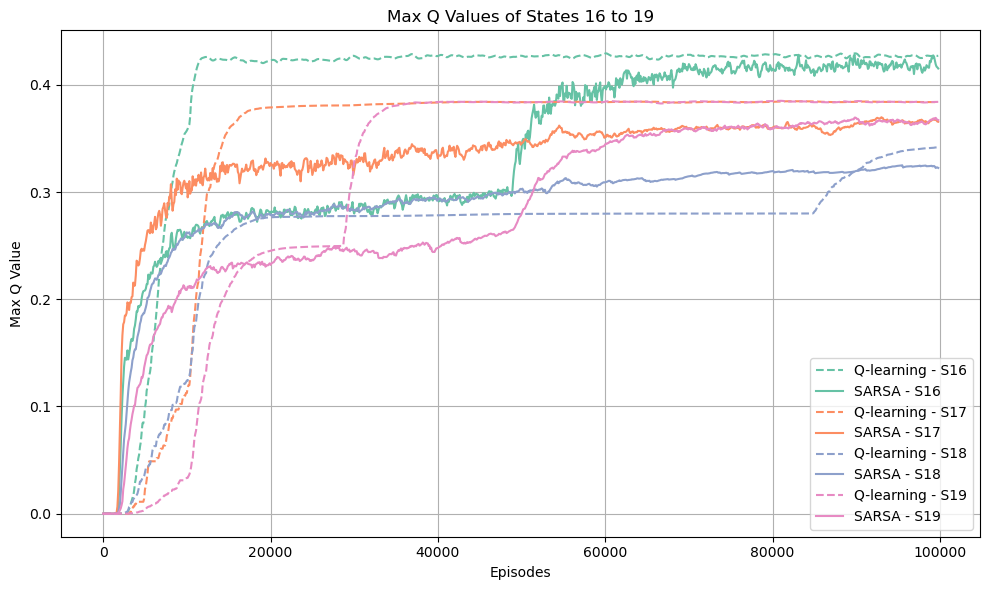

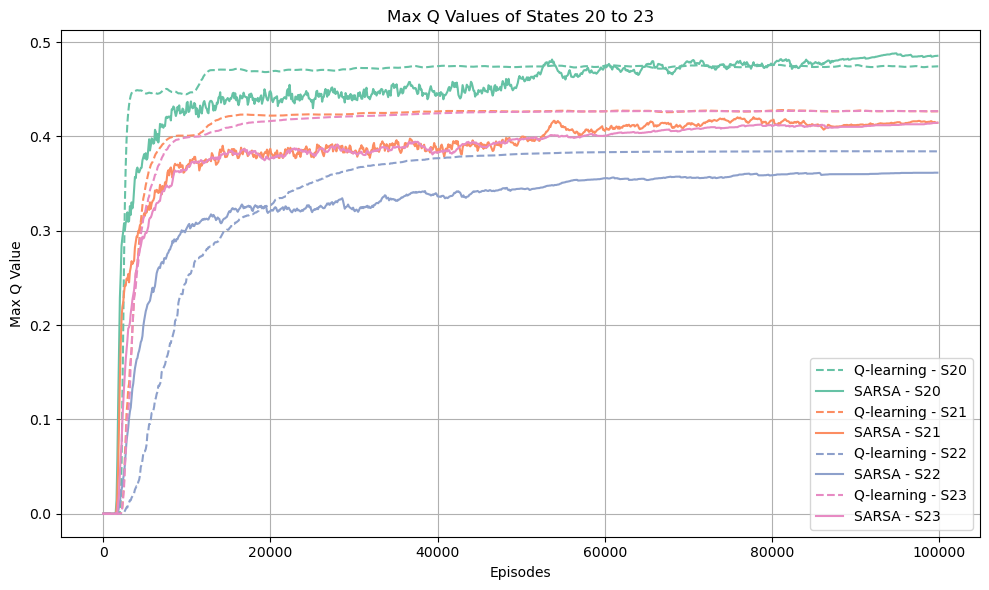

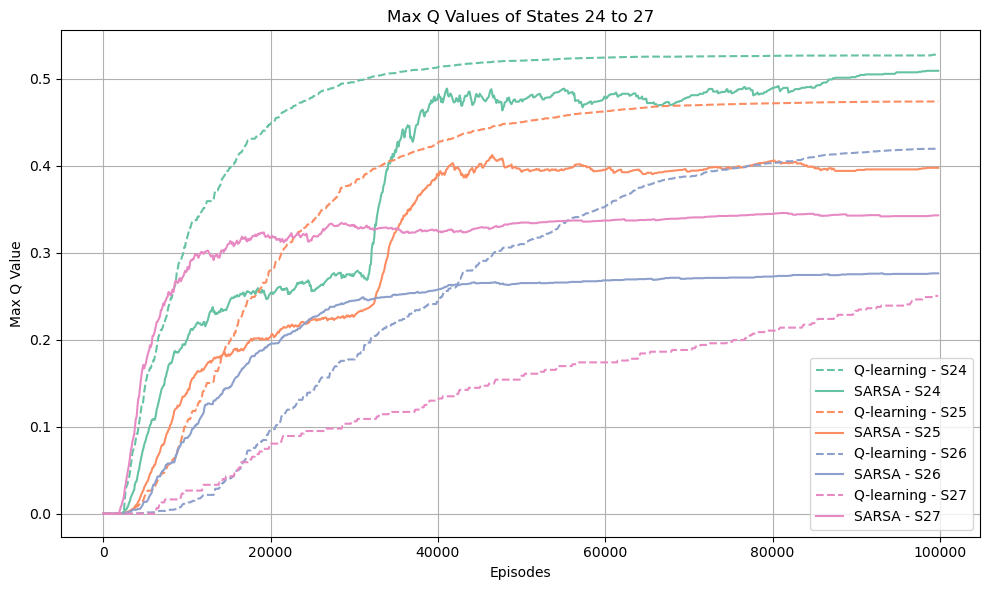

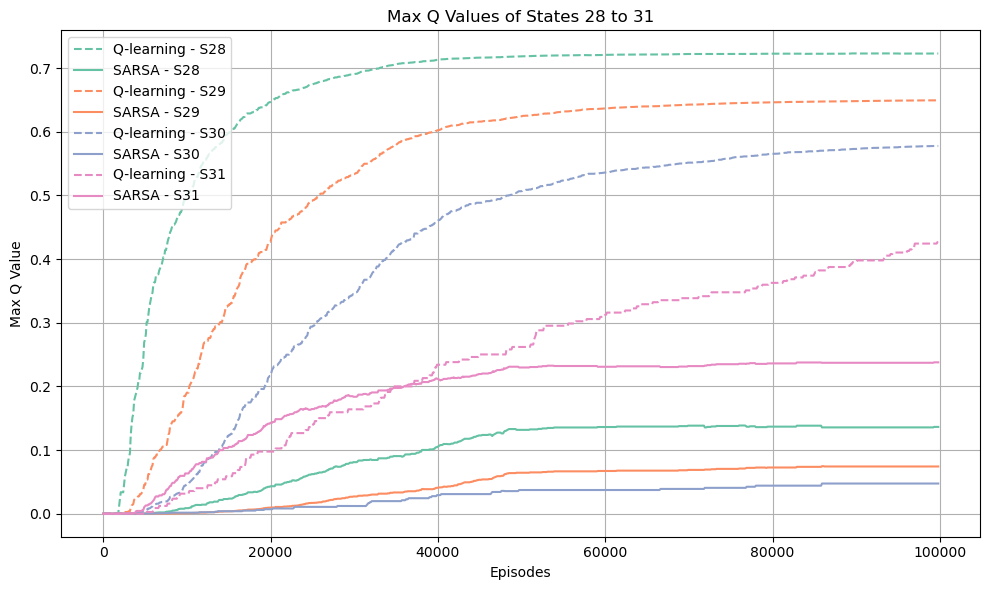

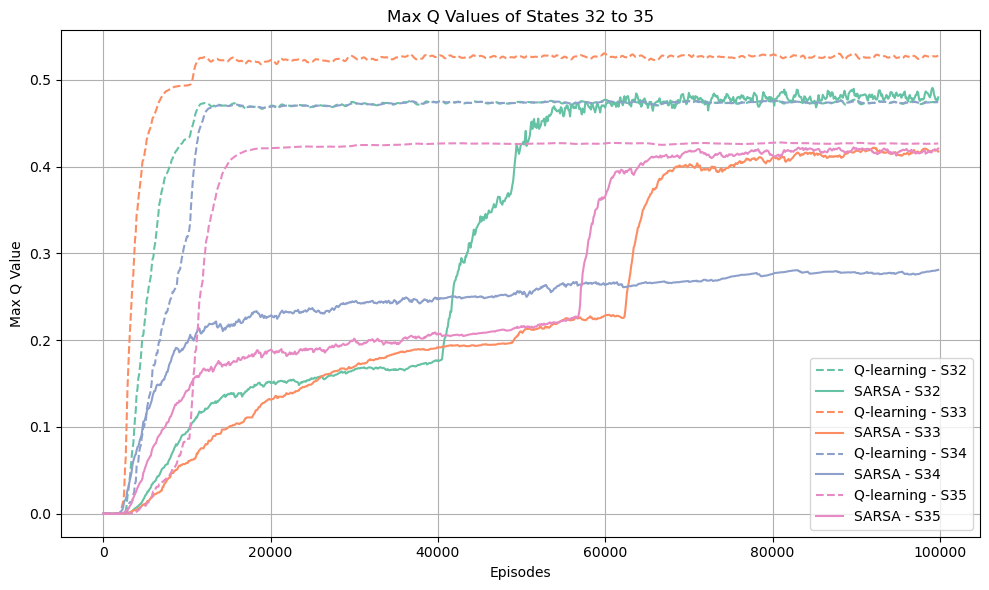

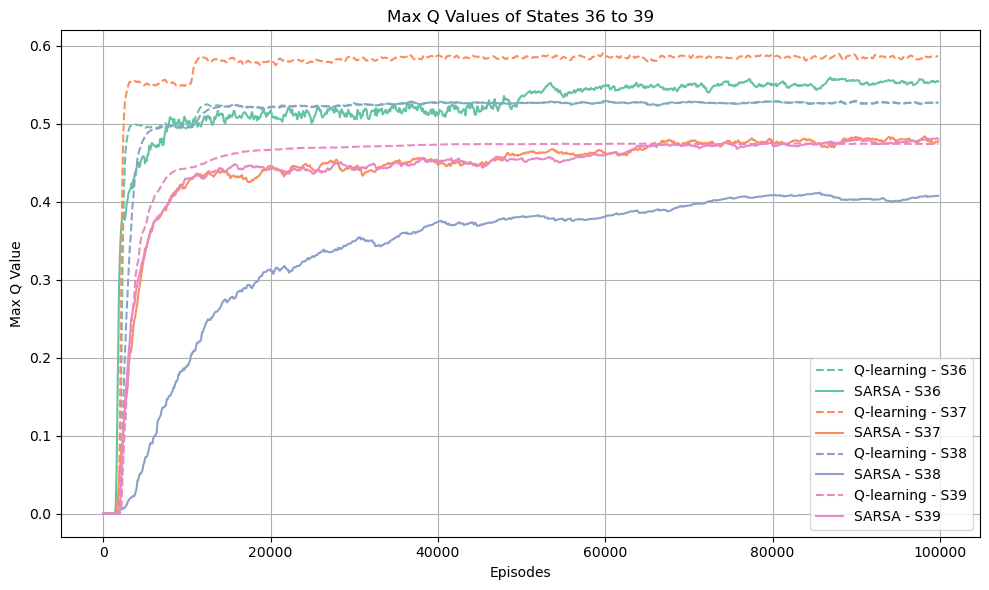

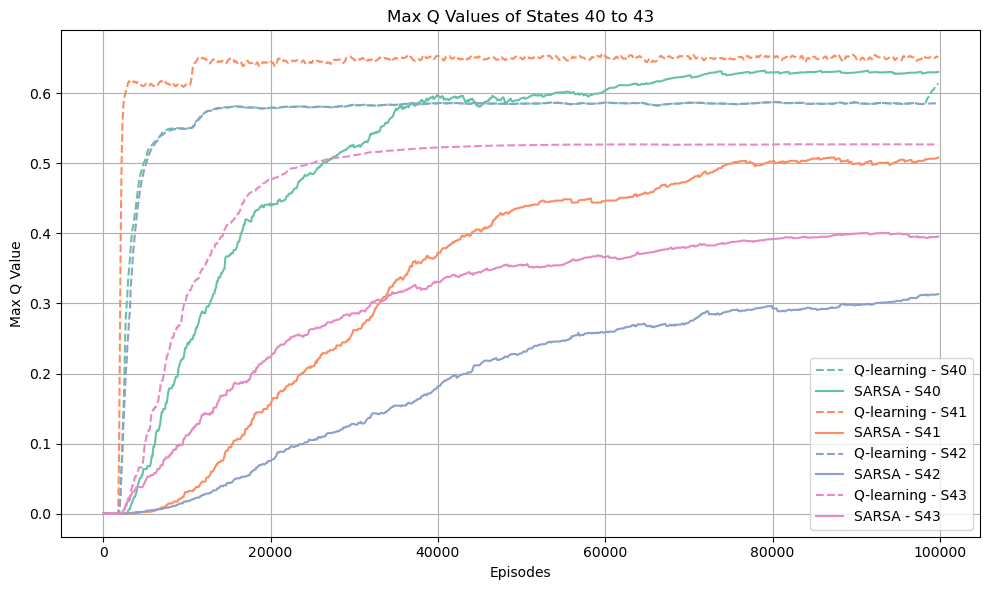

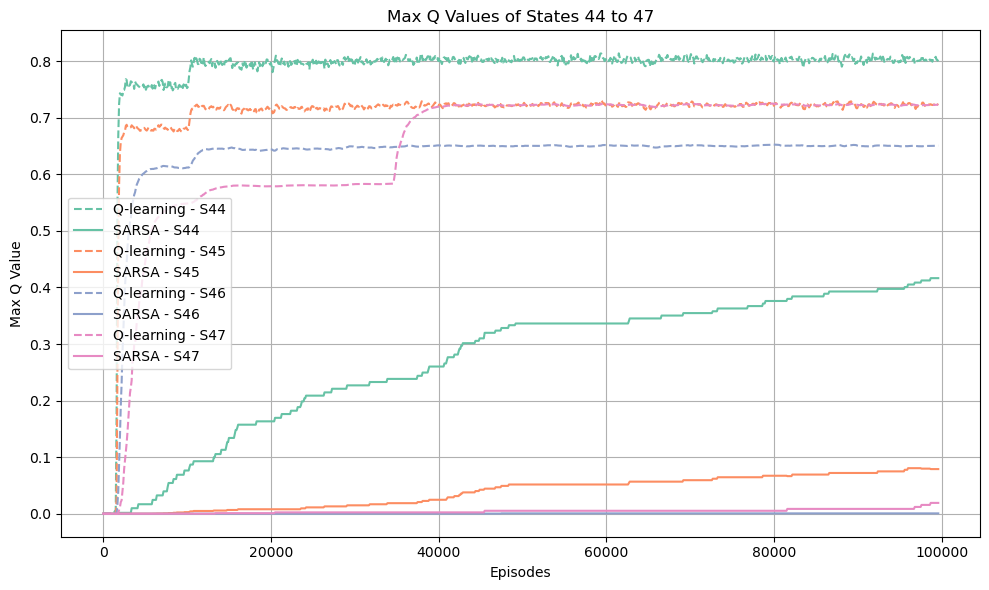

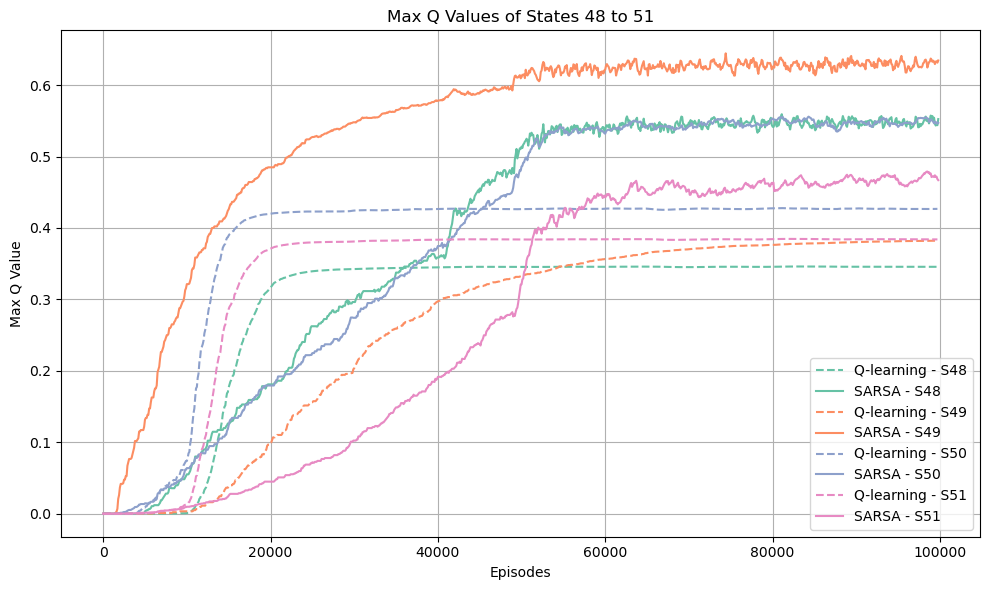

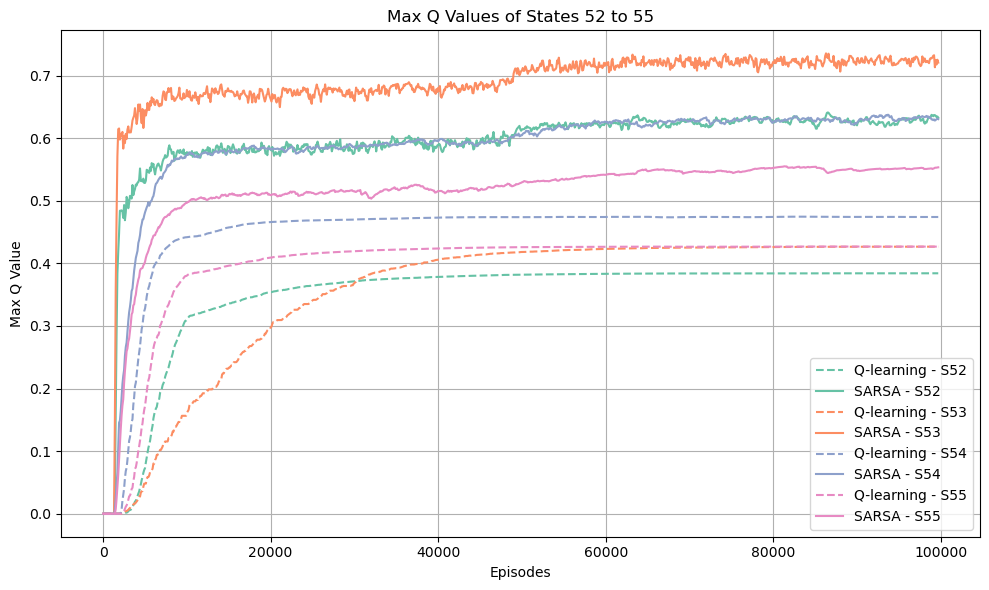

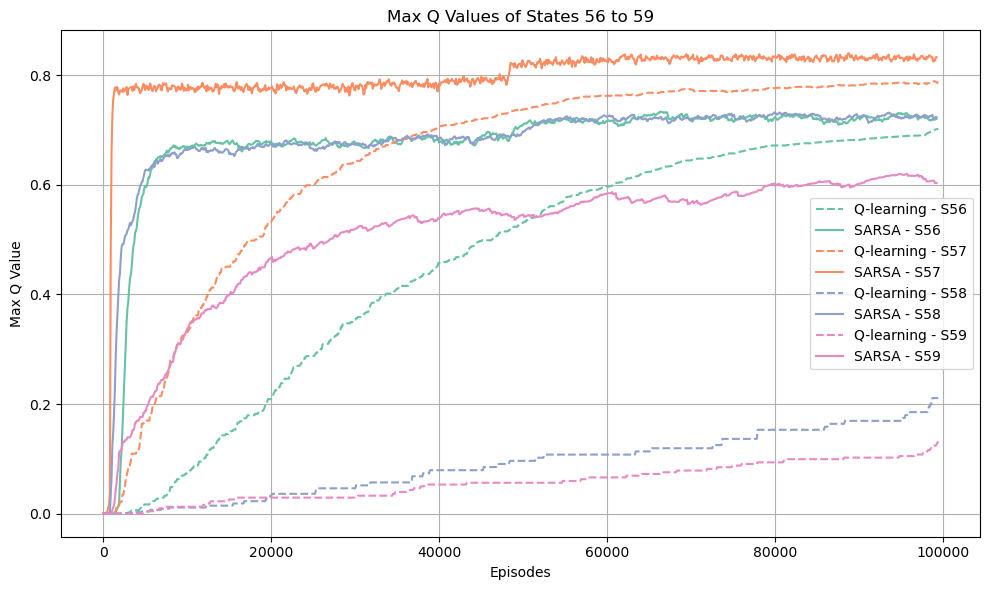

In [8]:


# CSV 파일 불러오기
s_q_history = pd.read_csv('./data/state_maxQ_Sarsa.csv', index_col=0).iloc[:, 0]
q_q_history = pd.read_csv('./data/state_maxQ_qlearning.csv', index_col=0).iloc[:, 0]

# 문자열로 저장된 리스트 → 실제 리스트로 변환
s_q_history = s_q_history.apply(ast.literal_eval)
q_q_history = q_q_history.apply(ast.literal_eval)

# state 리스트 정렬
s_states = sorted(s_q_history.keys())
q_states = sorted(q_q_history.keys())

palette = sns.color_palette("Set2", 4)  


for i in range(0, 60, 4):
    subset_states = s_states[i:i+4]
    
    plt.figure(figsize=(10, 6))
    
    for s in subset_states:
        
        color = palette[s % 4]  
        
        x = np.arange(0, len(q_q_history[s]) * 100, 100)
        y = np.arange(0, len(s_q_history[s]) * 100, 100)
        
        plt.plot(x, q_q_history[s], label=f"Q-learning - S{s}", linestyle='--', color=color)
        plt.plot(y, s_q_history[s], label=f"SARSA - S{s}", linestyle='-', color=color)

        
    plt.xlabel("Episodes")
    plt.ylabel("Max Q Value")
    plt.title(f"Max Q Values of States {subset_states[0]} to {subset_states[-1]}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [9]:
from IPython.display import Video, display, HTML

video_list = ["qlearning", "sarsa"]
for v in video_list:
    filename = f"./videos/minigrid_run_{v}.mp4"
    display(HTML(f"<h4>{v}</h4>"))
    display(Video(filename, embed=True))  
